## DRAGON REAL ESTATE - PRICE PREDICTOR


In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
 %matplotlib inline

c:\users\test\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

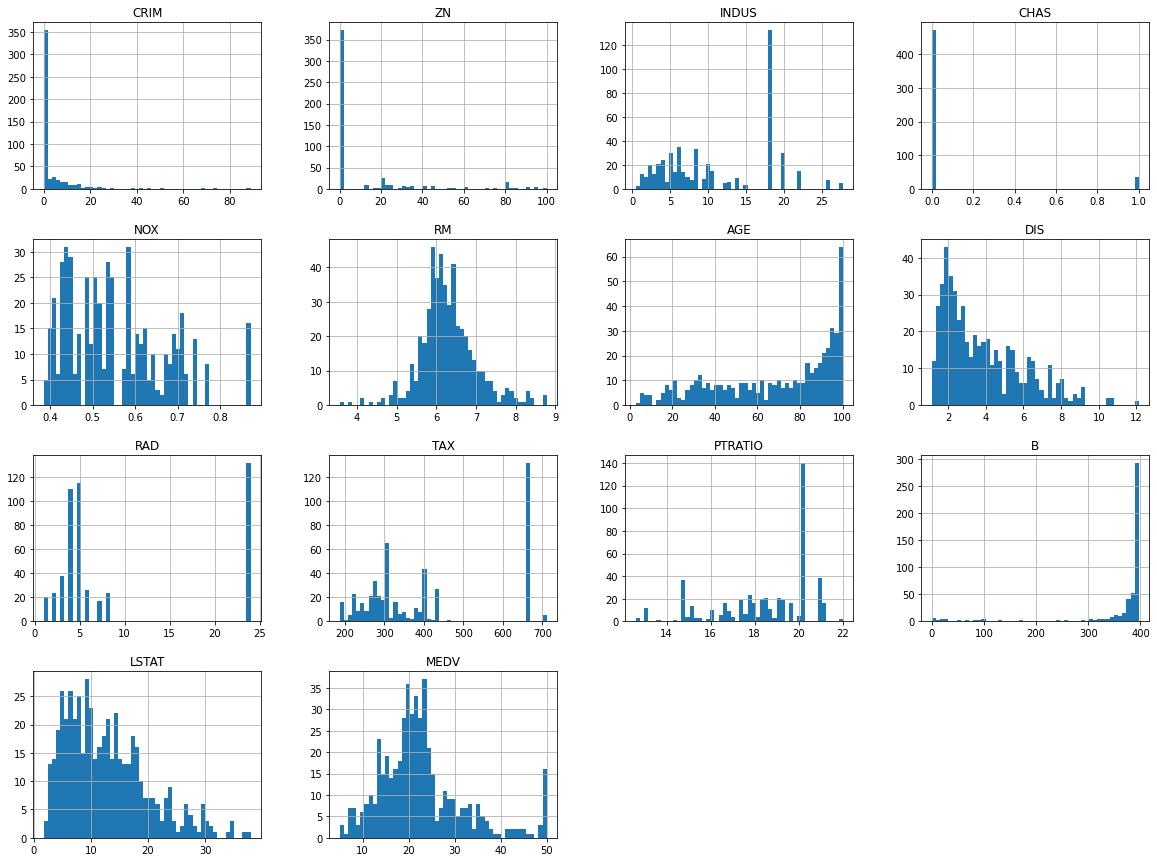

In [6]:
#FOR PLOTTING HISTOGRAM
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

## train test splitting

In [7]:
#FOR LEARNING PURPOSE OTHERWISE SAME FUNCTIO IS AVAILABLE AS IT IS IN THE SKLEARN MODULE 
#import numpy as np
#def split_train_test(data,test_ratio):
    #np.random.seed(42)
    #shuffled=np.random.permutation(len(data)) 
    #test_set_size=int(len(data)*test_ratio)
    #test_indices=shuffled[:test_set_size]
    #train_indices=shuffled[test_set_size:]
    #return data.iloc[train_indices], data.iloc[test_indices]


In [8]:
#train_set,test_set=split_train_test(housing,0.2)

In [9]:
#print(f"Rows in train test: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train test: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train test: 404
 Rows in test set: 102



In [11]:
from sklearn.model_selection import  StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [12]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [13]:
housing=strat_train_set.copy()

##  LOOKING FOR CORELATIONS

In [14]:
corr_matrix=housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.683578
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

c:\users\test\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

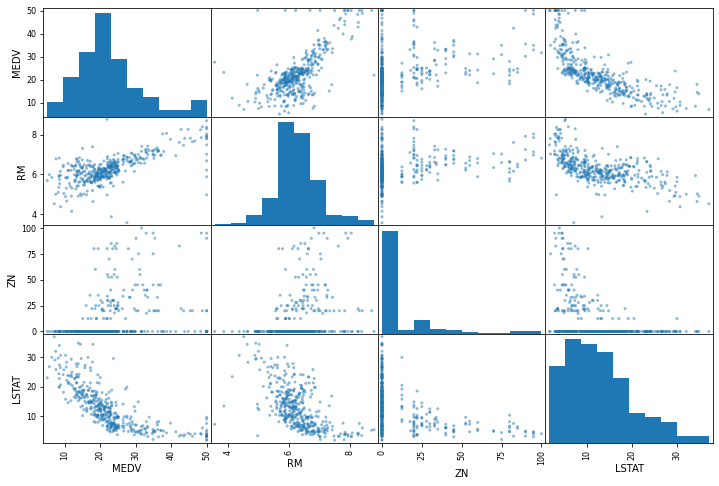

In [16]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

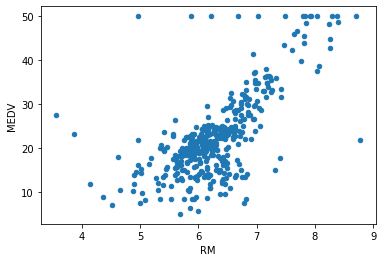

In [17]:
housing.plot(kind="scatter",x="RM",y="MEDV")

## TRYING OUT ATTRIBUTE COMBINATIONS

In [18]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281803,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.474473
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716012,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.543158
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.772262
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [21]:
housing=strat_train_set.drop("MEDV", axis=1)
labels=strat_train_set["MEDV"].copy()

## Missing attributes

In [22]:
#How to take care of the missing attributes:
    #1. Get rid of the missing data points
    #2.Get rid of the whole attribute
    #3.Set the value to zero,mean or median(whatever suitable)

In [23]:
#option 1
a=housing.dropna(subset=["RM"])
a.shape

(400, 13)

In [24]:
#option 2
housing.drop("RM",axis=1)


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [25]:
#option 3
median=housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [27]:
imputer.statistics_ #calculates median for all the 15 columns in the dataset


array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [28]:
X=imputer.transform(housing)

In [29]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [30]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281126,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712482,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SCIKIT-LEARN DESIGN

THERE ARE THREE TYPES OF OBJECTS:
1. Estimators: It estimates some data based on a dataset. eg: imputer. it has two methods which are the fit method and the transform method. fit method fits the dataset or computes some parameters based on that dataset
2. Transformers: takes input and returns the output based on the learnings from the fit( . it has a convenience function called fit_transform() which fits and then transforms.
3. predictors: eg linear regression model. 2 fncns: fit and predict. also gives score function whih will evaluate the predictions.

## feature scaling

two types of feature scaling methods:
1. min-max scaling or normalization: (value-min)/(max-min): values bw 0 and 1
 for this sklearn provides a class called MinMacScaler for this
2. standardization : (value-mean)/standard deviation.
for this sklearn provides a class called the StandardScaler.

## creating a pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler())
    
])#takes a list as argument


In [32]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)#this makes a nnumpy array and not a data frame
# we will not make a dataframe of thia numpy array because the predictors that we use in step three take numpy arrays as the input

In [33]:
housing_num_tr.shape #thisss is the training data

(404, 13)

## selecting the desired model for dragon real estates 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,labels) # to fit model 

RandomForestRegressor()

In [35]:
some_data=housing.iloc[:5]#for training
some_labels=labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.339, 25.423, 16.385, 23.275, 23.537])

In [36]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the model
linear regression model guves a lot of mean squared error hence we discard that

decision tree regressor tends to overfit the model as the error comes out to be zer0

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse# this gives  a lot of mean square error hence we will discard this model as it is not that much efficient 

1.1867727236184487

## we will try using a better evaluation technique which is the cross validation

In [38]:
#here we are applying cross validation to the decision tree by commenting out the linear regression model above to see the error
import numpy as np
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,labels,scoring="neg_mean_squared_error",cv=10)#cv tells how many folds we want
rmse_scores=np.sqrt(-scores)

In [39]:
rmse_scores

array([2.71190633, 2.7770838 , 4.48404639, 2.6881879 , 3.42439024,
       2.53289488, 5.06747859, 3.23760789, 3.39876683, 3.32739632])

In [40]:
#here we are applying cross validation to the linear model by commenting out the decision tree model above
#import numpy as np
#from sklearn.model_selection import cross_val_score
#scores=cross_val_score(model,housing_num_tr,labels,scoring="neg_mean_squared_error",cv=10)#cv tells how many folds we want
#rmse_scores=np.sqrt(-scores)

In [41]:
#rmse_scores

## now to compare both the models and find out which one is better, we will find the mean and standard deviation for the both of the error list and then compare

In [42]:
def print_scores(scores):
    print("scores are: ",scores)
    print("mean: ",scores.mean())
    print("standard deviation: ",scores.std())

In [43]:
print_scores(rmse_scores)

scores are:  [2.71190633 2.7770838  4.48404639 2.6881879  3.42439024 2.53289488
 5.06747859 3.23760789 3.39876683 3.32739632]
mean:  3.364975915244552
standard deviation:  0.7807469955392732


## after comparing you will get to know that the decision tree model's mean and std deviation are less than that of the linear model. so decisionn tree is a better model.

## now we will be trying a third model which will be the random forest regressor

## third model proves to be the best as it gives the least mean

## saving the model

In [44]:
from joblib import dump,load
dump(model,"Dragon.joblib")

['Dragon.joblib']

##  testing the model by test data

In [45]:
import numpy as np
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse


3.049526795499686

In [46]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24329153, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49729314, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28509525,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13332458, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0433864 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])